# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
anime_df = pd.read_csv("/content/dataset_clustering.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [4]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
anime_df.describe(include="all")

,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Saru Kani Gassen,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


In [7]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = anime_df.isnull().sum()
missing_values[missing_values > 0]

,0
genre,62
type,25
rating,230


In [8]:
#Memerika nilai unknown pada kolom episode
unknown_episodes = anime_df[anime_df['episodes'] == 'Unknown']
print(unknown_episodes)

       anime_id                                               name  \
74           21                                          One Piece   
252         235                                    Detective Conan   
615        1735                                 Naruto: Shippuuden   
991         966                                   Crayon Shin-chan   
1021      33157             Tanaka-kun wa Itsumo Kedaruge Specials   
...         ...                                                ...   
12265     34361                           Kyonyuu Reijou MC Gakuen   
12274     34492  Nuki Doki! Tenshi to Akuma no Sakusei Battle -...   
12280     34312                                       Saimin Class   
12282     34388                    Shikkoku no Shaga The Animation   
12285     34399                                   Taimanin Asagi 3   

                                                   genre     type episodes  \
74     Action, Adventure, Comedy, Drama, Fantasy, Sho...       TV  Unknown   
252

In [9]:
# Memeriksa jumlah duplikasi di setiap kolom
print("Jumlah duplikasi: ", anime_df.duplicated().sum())

Jumlah duplikasi:  0


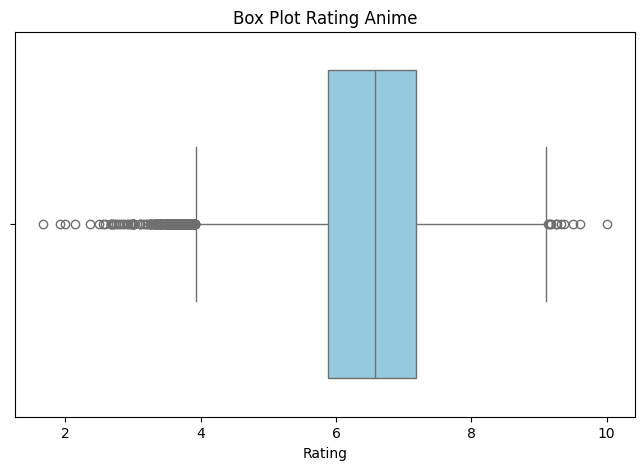

In [10]:
# Memeriksa nilai quartil pada kolom rating
plt.figure(figsize=(8, 5))
sns.boxplot(x=anime_df['rating'], color='skyblue')

plt.title('Box Plot Rating Anime')
plt.xlabel('Rating')

plt.show()

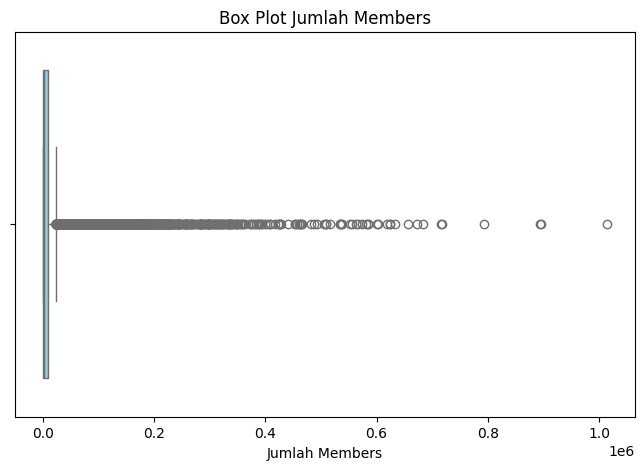

In [11]:
# Memeriksa nilai quartil pada kolom members
plt.figure(figsize=(8, 5))
sns.boxplot(x=anime_df['members'], color='skyblue')

# Tambahkan judul dan label
plt.title('Box Plot Jumlah Members')
plt.xlabel('Jumlah Members')

plt.show()

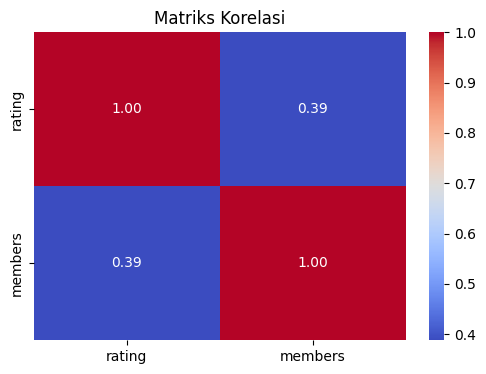

In [12]:
# Matriks korelasi untuk variabel numerik
numerical_cols = ['rating', 'members']
plt.figure(figsize=(6, 4))
sns.heatmap(anime_df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

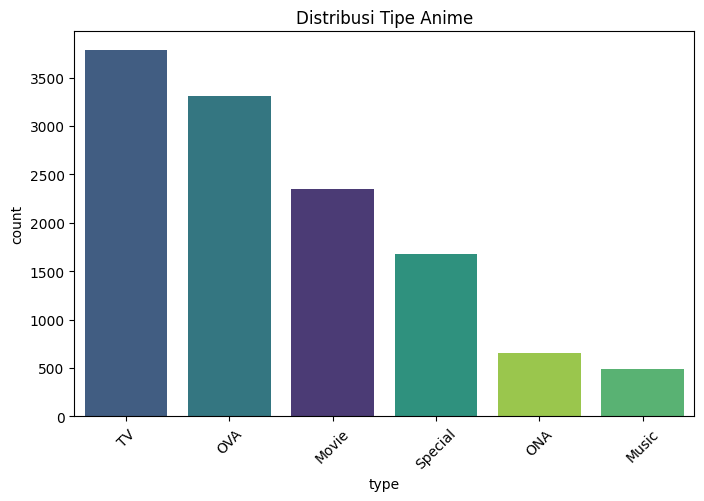

In [13]:
# Diagram batang untuk variabel type
plt.figure(figsize=(8, 5))
sns.countplot(
    data=anime_df,
    x='type',
    order=anime_df['type'].value_counts().index,
    hue='type',
    palette="viridis",
    legend=False
)
plt.xticks(rotation=45)
plt.title("Distribusi Tipe Anime")
plt.show()

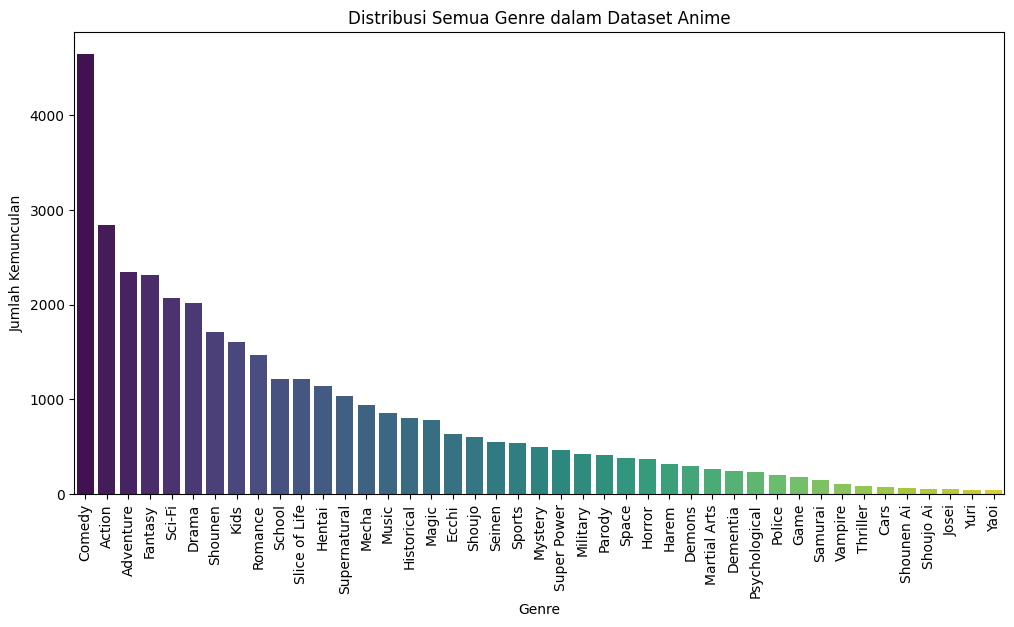

In [14]:
# Memisahkan genre yang dipisahkan dengan koma menjadi format list
all_genres = anime_df['genre'].str.split(', ')

# Mengubah list genre menjadi satu dataframe panjang (1 genre per baris)
genre_exploded = all_genres.explode()

# Menghitung jumlah kemunculan setiap genre
genre_counts = genre_exploded.value_counts()

# Mengatur ukuran figure
plt.figure(figsize=(12, 6))

# Membuat bar chart semua genre
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, dodge=False, palette="viridis", legend=False)

# Menyesuaikan tampilan
plt.xticks(rotation=90)  # Memutar label genre agar tidak bertumpuk
plt.xlabel("Genre")
plt.ylabel("Jumlah Kemunculan")
plt.title("Distribusi Semua Genre dalam Dataset Anime")
plt.show()

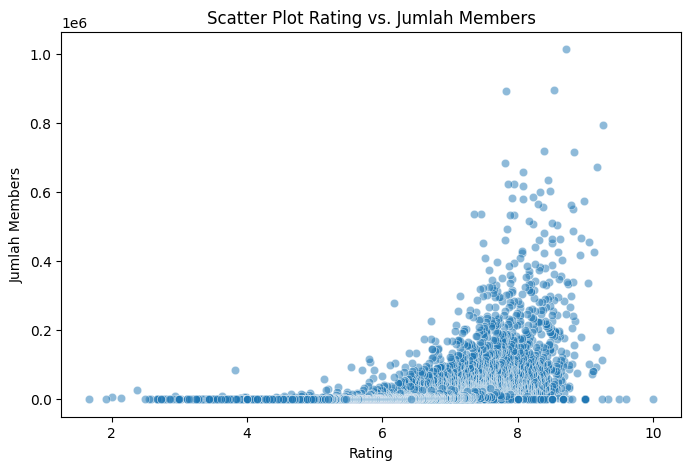

In [15]:
# Scatter plot untuk melihat hubungan antara rating dan jumlah members
plt.figure(figsize=(8, 5))
sns.scatterplot(x=anime_df['rating'], y=anime_df['members'], alpha=0.5)
plt.title("Scatter Plot Rating vs. Jumlah Members")
plt.xlabel("Rating")
plt.ylabel("Jumlah Members")
plt.show()

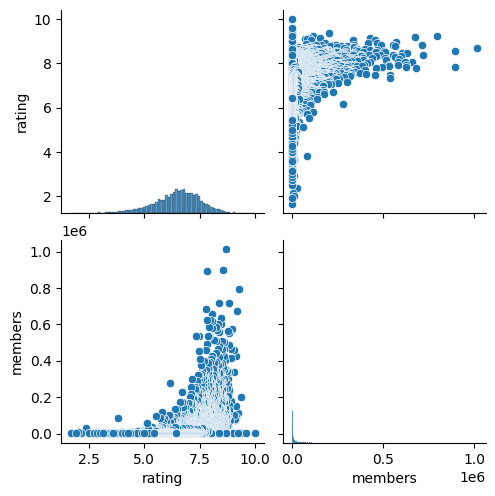

In [16]:
# Pairplot untuk melihat pola hubungan antar variabel numerik
sns.pairplot(anime_df[numerical_cols])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [17]:
# Mengisi nilai kosong pada kolom 'type' dengan modus (nilai yang paling sering muncul)
mode_type = anime_df['type'].mode()[0]
anime_df.loc[:, 'type'] = anime_df['type'].fillna(mode_type)

# Simpan nilai sebelum perubahan
before_changes = anime_df['episodes'].replace('Unknown', np.nan)

# Konversi 'Unknown' ke NaN dan ubah tipe data ke float
anime_df['episodes'] = before_changes.astype(float)

# Mengatur episodes menjadi 1 untuk Movie
anime_df.loc[anime_df['type'] == 'Movie', 'episodes'] = 1

# Menghitung mean untuk setiap tipe anime selain Movie
mean_values = anime_df.groupby('type')['episodes'].mean()

# Mengisi nilai NaN dengan mean sesuai tipe anime
anime_df['episodes'] = anime_df.apply(lambda row: mean_values[row['type']] if pd.isna(row['episodes']) else row['episodes'], axis=1)

# Menampilkan hanya baris yang mengalami perubahan
changed_rows = anime_df[before_changes.isna()][['name', 'type', 'episodes']]

# Menampilkan beberapa hasil perubahan
print(changed_rows.head())

                                        name     type   episodes
74                                 One Piece       TV  35.915595
252                          Detective Conan       TV  35.915595
615                       Naruto: Shippuuden       TV  35.915595
991                         Crayon Shin-chan       TV  35.915595
1021  Tanaka-kun wa Itsumo Kedaruge Specials  Special   2.561341


In [18]:
#Mengisi missing value dangan nilai median
anime_df['rating'] = anime_df['rating'].fillna(anime_df['rating'].median())

#Mengisi missing value dengan modus
anime_df['genre'] = anime_df['genre'].fillna(anime_df['genre'].mode()[0])

In [19]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  float64
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 672.5+ KB


In [20]:
# Binning Rating
rating_bins = [0, 2, 3, 4, 5, 6, 7, 8, 8.5, 9, 10]  # Rentang rating
rating_labels = ["Very Low", "Low", "Below Average", "Slightly Below Average", "Medium", "Slightly Above Average", "Above Average", "High", "Very High", "Excellent"]  # Label kategori
anime_df["rating_category"] = pd.cut(anime_df["rating"], bins=rating_bins, labels=rating_labels, include_lowest=True)


In [21]:
#Normalisasi kolom 'members'
scaler = StandardScaler()
anime_df["members_scaled"] = scaler.fit_transform(anime_df[["members"]])

print(anime_df[['members', 'members_scaled']].head(10))

   members  members_scaled
0   200630        3.330241
1   793665       14.148406
2   114262        1.754713
3   673572       11.957666
4   151266        2.429742
5    93351        1.373254
6   425855        7.438804
7    80679        1.142091
8    72534        0.993510
9    81109        1.149935


In [22]:
# Encoding rating_category
encoder = OneHotEncoder()
rating_encoded = encoder.fit_transform(anime_df[["rating_category"]]).toarray()
rating_encoded_df = pd.DataFrame(rating_encoded, columns=encoder.get_feature_names_out(["rating_category"]))

In [23]:
anime_df.describe()

,anime_id,episodes,rating,members,members_scaled
count,12294.000000,12294.000000,12294.000000,1.229400e+04,1.229400e+04
mean,14058.221653,12.741211,6.475700,1.807134e+04,3.698937e-17
std,11455.294701,46.327080,1.017179,5.482068e+04,1.000041e+00
min,1.000000,1.000000,1.670000,5.000000e+00,-3.295668e-01
25%,3484.250000,1.000000,5.900000,2.250000e+02,-3.255535e-01
50%,10260.500000,2.000000,6.570000,1.550000e+03,-3.013828e-01
75%,24794.500000,12.000000,7.170000,9.437000e+03,-1.575079e-01
max,34527.000000,1818.000000,10.000000,1.013917e+06,1.816625e+01


In [24]:
print(anime_df.isnull().sum())

anime_id           0
name               0
genre              0
type               0
episodes           0
rating             0
members            0
rating_category    0
members_scaled     0
dtype: int64


In [25]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   anime_id         12294 non-null  int64   
 1   name             12294 non-null  object  
 2   genre            12294 non-null  object  
 3   type             12294 non-null  object  
 4   episodes         12294 non-null  float64 
 5   rating           12294 non-null  float64 
 6   members          12294 non-null  int64   
 7   rating_category  12294 non-null  category
 8   members_scaled   12294 non-null  float64 
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 780.9+ KB


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [26]:
# Gabungkan rating yang sudah di-encode dengan members_scaled
data_for_clustering = pd.concat([rating_encoded_df, anime_df[["members_scaled"]]], axis=1)

# Menentukan jumlah cluster
optimal_k = 8

# Clustering dengan K=8
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
anime_df["cluster"] = kmeans.fit_predict(data_for_clustering)

# Urutkan cluster berdasarkan jumlah rata-rata anggota (members), cluster terbaik di 0
cluster_order = anime_df.groupby("cluster")["members"].mean().sort_values(ascending=False).index
cluster_mapping = {old: new for new, old in enumerate(cluster_order)}
anime_df["cluster"] = anime_df["cluster"].map(cluster_mapping).fillna(-1).astype(int)

# Menampilkan hasil clustering
print(anime_df[['name', 'cluster']].head())

                               name  cluster
0                    Kimi no Na wa.        1
1  Fullmetal Alchemist: Brotherhood        0
2                          Gintama°        2
3                       Steins;Gate        0
4                     Gintama&#039;        2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

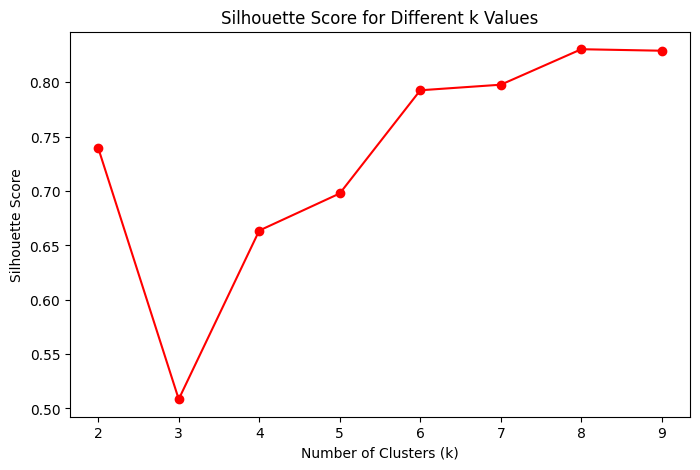

In [27]:
# Mencoba berbagai nilai K dan menghitung silhouette score
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_for_clustering)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_for_clustering, cluster_labels))

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='red')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k Values")
plt.show()

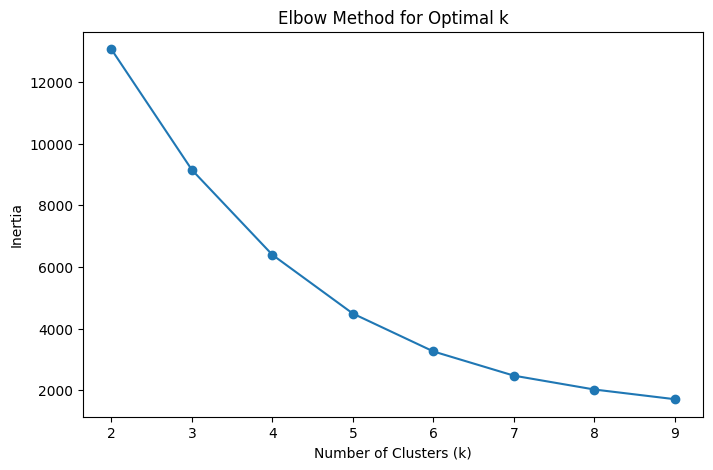

In [28]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [29]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(data_for_clustering, anime_df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.8305116397436049


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [30]:
# Gabungkan rating yang sudah di-encode dengan members_scaled
data_for_clustering = pd.concat([rating_encoded_df, anime_df[["members_scaled"]]], axis=1)

# Clustering sebelum feature selection
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
anime_df["cluster_before"] = kmeans.fit_predict(data_for_clustering)
silhouette_before = silhouette_score(data_for_clustering, anime_df["cluster_before"])

# Feature selection menggunakan SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # Coba dengan semua fitur
selected_features = selector.fit_transform(data_for_clustering, anime_df["cluster_before"])
selected_feature_names = data_for_clustering.columns[selector.get_support()]

# Clustering setelah feature selection
data_selected = pd.DataFrame(selected_features, columns=selected_feature_names)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
anime_df["cluster_after"] = kmeans.fit_predict(data_selected)
silhouette_after = silhouette_score(data_selected, anime_df["cluster_after"])

# Pilih hasil clustering terbaik
if silhouette_after > silhouette_before:
    anime_df["cluster"] = anime_df["cluster_after"]
    best_silhouette = silhouette_after
else:
    anime_df["cluster"] = anime_df["cluster_before"]
    best_silhouette = silhouette_before

# Urutkan cluster berdasarkan jumlah rata-rata anggota (members)
cluster_order = anime_df.groupby("cluster")["members"].mean().sort_values(ascending=False).index
cluster_mapping = {old: new for new, old in enumerate(cluster_order)}
anime_df["cluster"] = anime_df["cluster"].map(cluster_mapping).fillna(-1).astype(int)

# Menampilkan hasil clustering terbaik
print(f"Silhouette Score Sebelum Feature Selection: {silhouette_before}")
print(f"Silhouette Score Setelah Feature Selection: {silhouette_after}")
print(anime_df[['name', 'cluster']].head())

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Silhouette Score Sebelum Feature Selection: 0.8305116397436049
Silhouette Score Setelah Feature Selection: 0.8305116397436049
                               name  cluster
0                    Kimi no Na wa.        1
1  Fullmetal Alchemist: Brotherhood        0
2                          Gintama°        2
3                       Steins;Gate        0
4                     Gintama&#039;        2


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.


Rata-rata Rating dan Members per Cluster:
           rating        members
cluster                         
0        8.347143  563476.959184
1        8.004951  260152.230392
2        7.664079  106920.536508
3        7.385704   14425.771040
4        5.983192   13017.405904
5        6.528607    5011.785932
6        5.596151    1168.166118
7        4.615320     408.737767


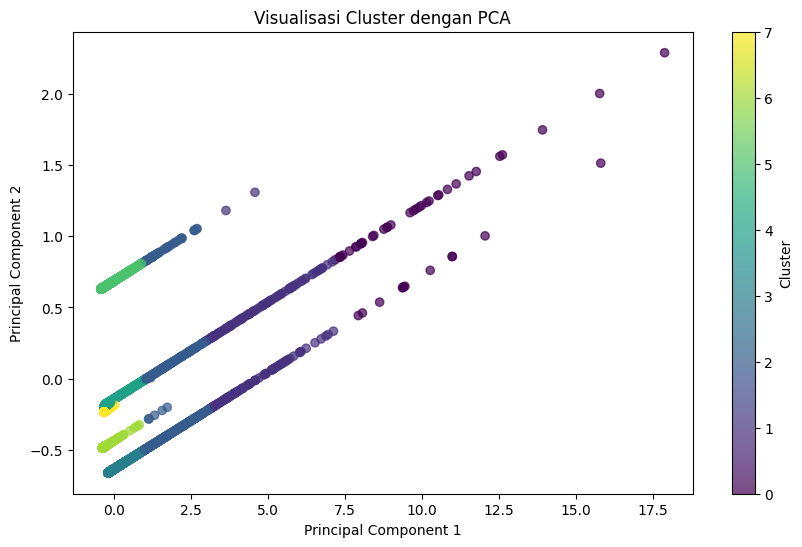

In [31]:
# Menampilkan rata-rata rating dan members per cluster
cluster_summary = anime_df.groupby("cluster")[['rating', 'members']].mean()
print("\nRata-rata Rating dan Members per Cluster:")
print(cluster_summary)

X = pd.concat([rating_encoded_df, anime_df[['members_scaled']]], axis=1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

anime_df['pca_1'] = X_pca[:, 0]
anime_df['pca_2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(anime_df['pca_1'], anime_df['pca_2'], c=anime_df['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi Cluster dengan PCA')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [32]:
# Drop kolom yang telah distandarisasi
anime_df.drop(columns=['members_scaled'], inplace=True)

# Cek apakah kolom berhasil dihapus
print(anime_df.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie       1.0    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.25   
3                                   Sci-Fi, Thriller     TV      24.0    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.16   

   members rating_category  cluster  cluster_before  cluster_after      pca_1  \
0   200630       Excellent        1               2              2   3.302001   
1   793665       Excellent        0               5     

In [33]:
# Drop kolom yang telah distandarisasi
anime_df.drop(columns=['rating_category'], inplace=True)

# Cek apakah kolom berhasil dihapus
print(anime_df.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie       1.0    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.25   
3                                   Sci-Fi, Thriller     TV      24.0    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.16   

   members  cluster  cluster_before  cluster_after      pca_1     pca_2  
0   200630        1               2              2   3.302001  0.303132  
1   793665        0               5              5  13.918956  1.74647

In [35]:
# Drop kolom yang telah distandarisasi
anime_df.drop(columns=['cluster_before', "cluster_after"], inplace=True)

# Cek apakah kolom berhasil dihapus
print(anime_df.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie       1.0    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.25   
3                                   Sci-Fi, Thriller     TV      24.0    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.16   

   members  cluster      pca_1     pca_2  
0   200630        1   3.302001  0.303132  
1   793665        0  13.918956  1.746479  
2   114262        2   1.755777  0.092927  
3   673572        0  11.768962  1.454193  
4  

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [37]:
# Fungsi untuk menghitung distribusi genre per cluster
def count_top_genres_per_cluster(df, cluster_col, genre_col, top_n=10):
    cluster_genre_counts = {}

    for cluster, group in df.groupby(cluster_col):
        genre_counter = Counter()

        for genres in group[genre_col].dropna():
            if isinstance(genres, str):
                genre_list = genres.split(', ')
            elif isinstance(genres, list):
                genre_list = genres
            else:
                continue

            genre_counter.update(genre_list)

        # Ambil hanya top N genre
        top_genres = dict(genre_counter.most_common(top_n))
        cluster_genre_counts[cluster] = top_genres

    return pd.DataFrame(cluster_genre_counts).fillna(0).astype(int).T

def analyze_clusters(df):
    for cluster, group in df.groupby("cluster"):
        print(f"\n## Analisis Cluster: {cluster}")

        # Analisis jumlah data per cluster
        num_data = len(group)
        print(f"\nJumlah Data: {num_data}")

        # Analisis rata-rata rating, jumlah episode, dan jumlah members per cluster
        cluster_summary = group[["rating", "episodes", "members"]].mean().round(2)
        print("\nRata-rata Rating, Jumlah Episode, dan Members:")
        print(cluster_summary.to_markdown())

        # Analisis distribusi genre per cluster (hanya 10 genre terbanyak per cluster)
        genre_distribution = count_top_genres_per_cluster(group, "cluster", "genre", top_n=10)
        print("\nDistribusi 10 Genre Terbanyak:")
        print(genre_distribution.to_markdown())

# Panggil fungsi untuk melakukan analisis
analyze_clusters(anime_df)


## Analisis Cluster: 0

Jumlah Data: 49

Rata-rata Rating, Jumlah Episode, dan Members:
|          |         0 |
|:---------|----------:|
| rating   |      8.35 |
| episodes |     39.73 |
| members  | 563477    |

Distribusi 10 Genre Terbanyak:
|    |   Action |   Supernatural |   Drama |   Comedy |   Shounen |   Adventure |   Fantasy |   Sci-Fi |   Super Power |   Romance |
|---:|---------:|---------------:|--------:|---------:|----------:|------------:|----------:|---------:|--------------:|----------:|
|  0 |       35 |             21 |      18 |       18 |        15 |          14 |        14 |       13 |            12 |         9 |

## Analisis Cluster: 1

Jumlah Data: 204

Rata-rata Rating, Jumlah Episode, dan Members:
|          |         0 |
|:---------|----------:|
| rating   |      8    |
| episodes |     24.11 |
| members  | 260152    |

Distribusi 10 Genre Terbanyak:
|    |   Comedy |   Action |   Romance |   School |   Supernatural |   Fantasy |   Shounen |   Drama |   Sci

# Analisis Karakteristik Cluster dari Model K-Means

## Cluster 0 (Anime Masterpiece)
- **Jumlah Data:** 49
- **Rata-rata Rating:** 8.35
- **Rata-rata Jumlah Episode:** 39.73
- **Rata-rata Members:** 563,477
- **Top Genre:** Action, Supernatural, Drama, Comedy, Shounen
- **Analisis:** Cluster ini berisi anime dengan rating tinggi dan jumlah anggota yang besar. Anime dalam kategori ini cenderung memiliki jumlah episode lebih panjang, menunjukkan cerita yang lebih kompleks dan populer.

## Cluster 1 (Anime Populer)
- **Jumlah Data:** 204
- **Rata-rata Rating:** 8.00
- **Rata-rata Jumlah Episode:** 24.11
- **Rata-rata Members:** 260,152
- **Top Genre:** Comedy, Action, Romance, School, Supernatural
- **Analisis:** Anime dalam cluster ini cukup populer dengan rating yang masih tinggi. Genre utama menunjukkan adanya variasi cerita yang menarik banyak penonton.

## Cluster 2 (Anime Menengah)
- **Jumlah Data:** 630
- **Rata-rata Rating:** 7.66
- **Rata-rata Jumlah Episode:** 16.67
- **Rata-rata Members:** 106,921
- **Top Genre:** Comedy, Action, Romance, Drama, Supernatural
- **Analisis:** Anime dalam cluster ini memiliki rating cukup baik tetapi tidak sepopuler cluster sebelumnya. Sebagian besar memiliki durasi lebih pendek.

## Cluster 3 (Anime Biasa)
- **Jumlah Data:** 2,721
- **Rata-rata Rating:** 7.39
- **Rata-rata Jumlah Episode:** 15.13
- **Rata-rata Members:** 14,425
- **Top Genre:** Comedy, Action, Adventure, Shounen, Drama
- **Analisis:** Cluster ini berisi anime dengan rating rata-rata yang masih layak tonton, tetapi kurang populer dibandingkan cluster di atas.

## Cluster 4 (Anime Kurang Populer)
- **Jumlah Data:** 542
- **Rata-rata Rating:** 5.98
- **Rata-rata Jumlah Episode:** 8.31
- **Rata-rata Members:** 13,017
- **Top Genre:** Comedy, Drama, Action, Shounen, Adventure
- **Analisis:** Cluster ini berisi anime dengan rating rendah dan jumlah anggota sedikit. Banyak di antaranya adalah anime pendek atau kurang menarik bagi penonton umum.

## Cluster 5 (Anime Niche)
- **Jumlah Data:** 4,919
- **Rata-rata Rating:** 6.53
- **Rata-rata Jumlah Episode:** 14.7
- **Rata-rata Members:** 5,011
- **Top Genre:** Comedy, Action, Adventure, Fantasy, Sci-Fi
- **Analisis:** Anime dalam cluster ini memiliki rating lebih rendah dan lebih sedikit anggota, kemungkinan besar mencakup anime yang lebih spesifik atau kurang dipromosikan.

## Cluster 6 (Anime Spesifik)
- **Jumlah Data:** 2,432
- **Rata-rata Rating:** 5.6
- **Rata-rata Jumlah Episode:** 7.22
- **Rata-rata Members:** 1,168
- **Top Genre:** Comedy, Kids, Hentai, Fantasy, Action
- **Analisis:** Cluster ini mencakup anime dengan rating lebih rendah, kemungkinan besar terdiri dari anime bertema anak-anak atau anime dewasa yang lebih niche.

## Cluster 7 (Anime Tidak Populer)
- **Jumlah Data:** 797
- **Rata-rata Rating:** 4.62
- **Rata-rata Jumlah Episode:** 4.67
- **Rata-rata Members:** 408
- **Top Genre:** Comedy, Kids, Music, Action, Dementia
- **Analisis:** Cluster ini mencakup anime dengan rating paling rendah dan jumlah penonton sedikit. Banyak di antaranya adalah anime pendek, eksperimental, atau memiliki daya tarik yang sangat terbatas.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [36]:
anime_df.to_csv("Dataset_inisiasi.csv", index=False)